In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [17]:
X.shape,y.shape

((100, 2), (100, 1))

In [15]:
y=y.reshape(100,-1)


In [ ]:
y

In [18]:
data=np.hstack([X,y])
df=pd.DataFrame(data,columns=['feature1','feature2','target'])

In [19]:
df.head()

,feature1,feature2,target
0,-0.742296,0.050930,96.185071
1,0.499289,-1.048919,-44.749773
2,1.418635,-1.501152,-174.341740
3,0.648366,-1.394420,-46.445836
4,0.271485,0.763271,31.099978


C:\Users\Arushi Prajapati\AppData\Local\Temp\ipykernel_2608\1561241258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['feature2'])


<Axes: xlabel='feature2', ylabel='Density'>

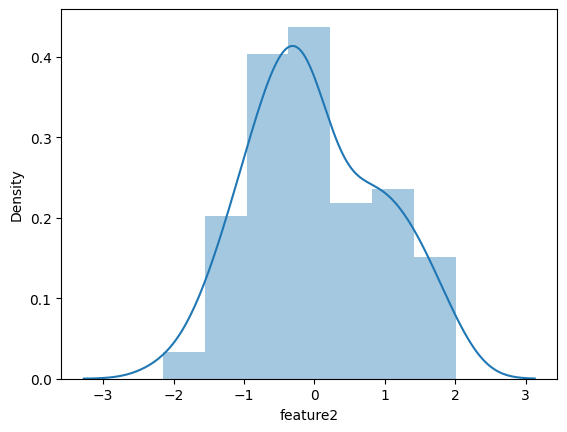

In [21]:
sns.distplot(df['feature2'])

In [22]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3,weights='distance',add_indicator=True)

In [23]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 2), (30, 2), (70, 1), (30, 1))

In [31]:
X_train_trf=imputer.fit_transform(X_train)

In [32]:
X_test_trf=imputer.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(X_train,y_train)
lr.fit(X_train_trf,y_train)

LinearRegression()

In [36]:
y_pred=lr.predict(X_test)
y_pred_trf=lr.predict(X_test_trf)

In [37]:
from sklearn.metrics import r2_score
print("without transformation",r2_score(y_test,y_pred))
print("with transformation",r2_score(y_test,y_pred_trf))

without transformation 0.6835725700669775
with transformation 0.6835725700669775
